In [36]:
import os
import urllib
import requests
from urllib.error import *
import pandas as pd
from openpyxl import load_workbook
import glob

In [36]:
import os
import urllib
import requests
from urllib.error import *
import pandas as pd
from openpyxl import load_workbook
import glob

In [4]:
out_dir = os.path.join("DATA", "CENSUS")
os.mkdir(out_dir)

In [10]:
url_dir = "https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/"

In [7]:
url ="https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-10.xlsx"
out_name = url.split("/")[-1]
print(out_name)
out_path = os.path.join(out_dir, out_name)
urllib.request.urlretrieve(url, out_path)

co-est2019-annres-10.xlsx


('DATA/CENSUS/co-est2019-annres-10.xlsx',
 <http.client.HTTPMessage at 0x7fe06b3d40d0>)

In [9]:
page = requests.get(url_dir).text
page

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<html>\n <head>\n  <title>Index of /programs-surveys/popest/tables/2010-2019/counties/totals</title>\n </head>\n <body>\n<!-- SIMPLE HEADER LAST UPDATED 2/16/2021 --> \r\n<!-- Used for CSS resets and making rendering consistent across all browsers/devices -->\r\n<!-- add Universal Federated Analytics -->\r\n<script language="javascript" id="_fed_an_ua_tag" src="//www.census.gov/main/javascript/federated-analytics-min.js?agency=DOC&subagency=CEN" class="global-file"></script>\r\n\r\n<!-- Adding original census.gov css -->\r\n<link rel="stylesheet" href="//www.census.gov/main/css/_new/bootstrap.css" class="cb-main-support global-file">\r\n<link rel="stylesheet" href="//www.census.gov/main/css/_new/base.css" class="cb-main-support global-file">\r\n<link rel="stylesheet" href="//www.census.gov/main/css/_new/extra.css" class="cb-main-support global-file">\r\n<link rel="stylesheet" href="//www.census.gov/main/css/_new/typeahead.css" c

In [18]:
for i in range(57):
    base_name = f"co-est2019-annres-{i:02d}.xlsx"
    url = os.path.join(url_dir, base_name)
    out_name = os.path.join(out_dir, base_name)
    try :
        urllib.request.urlretrieve(url, out_name)
    except HTTPError :
        print(f"file {url} not found")

file https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-00.xlsx not found
file https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-03.xlsx not found
file https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-07.xlsx not found
file https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-14.xlsx not found
file https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-43.xlsx not found
file https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-52.xlsx not found


In [29]:
wb = load_workbook(out_name, read_only = True)
ws = wb.active
ws

In [35]:
pd.read_excel(out_name, engine = 'openpyxl', header = 3)

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Wyoming,563626.0,563775.0,564487.0,567299.0,576305.0,582122.0,582531.0,585613.0,584215.0,578931.0,577601.0,578759.0
1,".Albany County, Wyoming",36299.0,36299.0,36469.0,36851.0,37359.0,37556.0,37620.0,37960.0,37923.0,38459.0,38728.0,38880.0
2,".Big Horn County, Wyoming",11668.0,11669.0,11666.0,11722.0,11758.0,11936.0,11853.0,11945.0,11941.0,11859.0,11877.0,11790.0
3,".Campbell County, Wyoming",46133.0,46133.0,46245.0,46550.0,47861.0,48038.0,48130.0,49258.0,48745.0,46402.0,46299.0,46341.0
4,".Carbon County, Wyoming",15885.0,15884.0,15848.0,15835.0,15709.0,15834.0,15872.0,15613.0,15689.0,15252.0,14879.0,14800.0
5,".Converse County, Wyoming",13833.0,13833.0,13822.0,13738.0,14028.0,14366.0,14201.0,14297.0,14094.0,13733.0,13658.0,13822.0
6,".Crook County, Wyoming",7083.0,7080.0,7118.0,7118.0,7139.0,7149.0,7234.0,7435.0,7499.0,7397.0,7445.0,7584.0
7,".Fremont County, Wyoming",40123.0,40123.0,40198.0,40519.0,41015.0,40912.0,40565.0,40219.0,40200.0,39818.0,39561.0,39261.0
8,".Goshen County, Wyoming",13249.0,13247.0,13422.0,13574.0,13637.0,13545.0,13522.0,13542.0,13306.0,13361.0,13292.0,13211.0
9,".Hot Springs County, Wyoming",4812.0,4812.0,4811.0,4805.0,4829.0,4831.0,4786.0,4716.0,4654.0,4686.0,4568.0,4413.0


In [33]:
out_name

'DATA/CENSUS/co-est2019-annres-56.xlsx'

In [50]:
for xlsfile in glob.glob( os.path.join("DATA","CENSUS", "co-est2019*xlsx")):
    df = pd.read_excel(xlsfile, engine = 'openpyxl', header = 3)
    cols = df.columns
    # check that columns are years
    #print( df.iloc[0,0], cols)
    # check that the rows with NaN are textual additionary information at the end of the data frame
    is_nan = df.isnull()
    row_nan = is_nan.any(axis = 1)
    #print(row_nan)
    print(df.iloc[0,0])
    print(df.loc[row_nan]["Unnamed: 0"])

Arizona
16    Note: The estimates are based on the 2010 Cens...
17                                  Suggested Citation:
18    Annual Estimates of the Resident Population fo...
19      Source: U.S. Census Bureau, Population Division
20                             Release Date: March 2020
Name: Unnamed: 0, dtype: object
Kentucky
121    Note: The estimates are based on the 2010 Cens...
122                                  Suggested Citation:
123    Annual Estimates of the Resident Population fo...
124      Source: U.S. Census Bureau, Population Division
125                             Release Date: March 2020
Name: Unnamed: 0, dtype: object
Connecticut
9     Note: The estimates are based on the 2010 Cens...
10                                  Suggested Citation:
11    Annual Estimates of the Resident Population fo...
12      Source: U.S. Census Bureau, Population Division
13                             Release Date: March 2020
Name: Unnamed: 0, dtype: object
South Dakota
67    Note: The e

Alaska
30    Note: The estimates are based on the 2010 Cens...
31                                  Suggested Citation:
32    Annual Estimates of the Resident Population fo...
33      Source: U.S. Census Bureau, Population Division
34                             Release Date: March 2020
Name: Unnamed: 0, dtype: object
Mississippi
83    Note: The estimates are based on the 2010 Cens...
84                                  Suggested Citation:
85    Annual Estimates of the Resident Population fo...
86      Source: U.S. Census Bureau, Population Division
87                             Release Date: March 2020
Name: Unnamed: 0, dtype: object
Oregon
37    Note: The estimates are based on the 2010 Cens...
38                                  Suggested Citation:
39    Annual Estimates of the Resident Population fo...
40      Source: U.S. Census Bureau, Population Division
41                             Release Date: March 2020
Name: Unnamed: 0, dtype: object
Illinois
103    Note: The estimates ar

In [63]:
# process data from xls files : remove useless rows, get county name and state
for xlsfile in glob.glob( os.path.join("DATA","CENSUS", "co-est2019*xlsx")):
    df = pd.read_excel(xlsfile, engine = 'openpyxl', header = 3)
    cols = df.columns
    state = df.iloc[0,0]
    is_nan = df.isnull()
    row_nan = is_nan.any(axis = 1)
    df.drop(index = df.index[row_nan], inplace = True)
    df[["county", "state"]] = df["Unnamed: 0"].str.split(',', expand = True)
    df["county"] = df["county"].str.strip(".")
    df.drop(columns = "Unnamed: 0", inplace = True)
    display(df.tail())
    

,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
11,980263.0,980263.0,981620.0,988381.0,993052.0,997127.0,1004229.0,1009103.0,1016707.0,1026391.0,1036554.0,1047279.0,Pima County,Arizona
12,375770.0,375764.0,379094.0,378041.0,382251.0,385398.0,395322.0,405614.0,417193.0,431564.0,446806.0,462789.0,Pinal County,Arizona
13,47420.0,47420.0,47415.0,47667.0,47359.0,46939.0,46636.0,46542.0,46400.0,46566.0,46395.0,46498.0,Santa Cruz County,Arizona
14,211033.0,211017.0,210983.0,211044.0,211990.0,214421.0,217716.0,220805.0,224575.0,228082.0,231772.0,235099.0,Yavapai County,Arizona
15,195751.0,195750.0,197127.0,202841.0,202475.0,202420.0,204054.0,205186.0,207247.0,209507.0,211612.0,213787.0,Yuma County,Arizona


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
116,20813.0,20813.0,20850.0,20901.0,20824.0,20782.0,20618.0,20609.0,20728.0,20628.0,20430.0,20333.0,Wayne County,Kentucky
117,13621.0,13621.0,13579.0,13528.0,13460.0,13357.0,13184.0,13155.0,13181.0,13012.0,13051.0,12942.0,Webster County,Kentucky
118,35637.0,35633.0,35718.0,35854.0,35768.0,35870.0,35833.0,36109.0,36108.0,36074.0,36101.0,36264.0,Whitley County,Kentucky
119,7355.0,7355.0,7361.0,7362.0,7194.0,7279.0,7252.0,7241.0,7189.0,7248.0,7199.0,7157.0,Wolfe County,Kentucky
120,24939.0,24946.0,25040.0,24944.0,25117.0,25345.0,25586.0,25860.0,26118.0,26385.0,26491.0,26734.0,Woodford County,Kentucky


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
4,165676.0,165672.0,165616.0,166174.0,165634.0,165329.0,164786.0,163724.0,163292.0,162942.0,162870.0,162436.0,Middlesex County,Connecticut
5,862477.0,862442.0,863357.0,863871.0,864566.0,862820.0,862885.0,860186.0,857901.0,857748.0,856971.0,854757.0,New Haven County,Connecticut
6,274055.0,274070.0,274004.0,273037.0,274091.0,272976.0,271462.0,269636.0,268403.0,267419.0,266285.0,265206.0,New London County,Connecticut
7,152691.0,152747.0,153239.0,153050.0,151967.0,151778.0,151693.0,151734.0,151162.0,151009.0,150689.0,150721.0,Tolland County,Connecticut
8,118428.0,118380.0,118544.0,118315.0,117914.0,117500.0,116752.0,116487.0,116102.0,116398.0,117059.0,116782.0,Windham County,Connecticut


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
62,8347.0,8349.0,8352.0,8356.0,8301.0,8306.0,8192.0,8131.0,8259.0,8303.0,8422.0,8384.0,Turner County,South Dakota
63,14399.0,14398.0,14491.0,14642.0,14800.0,14759.0,14991.0,14925.0,15137.0,15277.0,15570.0,15932.0,Union County,South Dakota
64,5438.0,5438.0,5442.0,5559.0,5446.0,5484.0,5502.0,5404.0,5472.0,5497.0,5477.0,5435.0,Walworth County,South Dakota
65,22438.0,22438.0,22436.0,22500.0,22584.0,22641.0,22676.0,22682.0,22649.0,22682.0,22759.0,22814.0,Yankton County,South Dakota
66,2801.0,2801.0,2824.0,2839.0,2879.0,2851.0,2858.0,2837.0,2871.0,2748.0,2744.0,2756.0,Ziebach County,South Dakota


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
17,66083.0,66072.0,65980.0,65875.0,65413.0,64786.0,64323.0,63732.0,63203.0,62883.0,62746.0,62385.0,Salem County,New Jersey
18,323444.0,323479.0,324122.0,326249.0,327407.0,329047.0,329329.0,329626.0,329875.0,330573.0,330181.0,328934.0,Somerset County,New Jersey
19,149265.0,148936.0,148855.0,148167.0,146979.0,145639.0,144593.0,143004.0,141925.0,141197.0,140801.0,140488.0,Sussex County,New Jersey
20,536499.0,536464.0,537369.0,539931.0,542970.0,546025.0,548014.0,549905.0,552781.0,554738.0,556402.0,556341.0,Union County,New Jersey
21,108692.0,108642.0,108576.0,108142.0,107563.0,106897.0,106981.0,106742.0,106059.0,105715.0,105528.0,105267.0,Warren County,New Jersey


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
42,284307.0,284304.0,284731.0,286102.0,288176.0,290414.0,292981.0,296558.0,300867.0,306740.0,314137.0,319785.0,Spartanburg County,South Carolina
43,107456.0,107485.0,107607.0,107308.0,107800.0,107747.0,107663.0,107151.0,107075.0,106431.0,106409.0,106721.0,Sumter County,South Carolina
44,28961.0,28973.0,28930.0,28670.0,28206.0,28004.0,27923.0,27743.0,27666.0,27400.0,27324.0,27316.0,Union County,South Carolina
45,34423.0,34410.0,34347.0,34109.0,33561.0,33074.0,32733.0,32519.0,31912.0,31216.0,30606.0,30368.0,Williamsburg County,South Carolina
46,226073.0,226037.0,226865.0,230074.0,234059.0,238605.0,244481.0,250566.0,257866.0,266165.0,273782.0,280979.0,York County,South Carolina


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
96,122623.0,122661.0,122886.0,124038.0,124559.0,124587.0,124586.0,124342.0,124269.0,123034.0,123237.0,123131.0,Wayne County,North Carolina
97,69340.0,69310.0,69264.0,68948.0,68906.0,68609.0,68414.0,68298.0,68581.0,68489.0,68563.0,68412.0,Wilkes County,North Carolina
98,81234.0,81224.0,81294.0,81155.0,81396.0,81189.0,81007.0,81240.0,81307.0,81436.0,81392.0,81801.0,Wilson County,North Carolina
99,38406.0,38409.0,38433.0,38342.0,38144.0,38063.0,37846.0,37619.0,37653.0,37588.0,37481.0,37667.0,Yadkin County,North Carolina
100,17818.0,17817.0,17805.0,17690.0,17624.0,17549.0,17542.0,17550.0,17610.0,17697.0,17873.0,18069.0,Yancey County,North Carolina


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
60,41207.0,41207.0,41199.0,41244.0,40908.0,40660.0,40285.0,40061.0,39751.0,39264.0,38792.0,38340.0,Webster Parish,Louisiana
61,23788.0,23785.0,23951.0,24109.0,24149.0,24654.0,25192.0,25554.0,25901.0,26184.0,26400.0,26465.0,West Baton Rouge Parish,Louisiana
62,11604.0,11604.0,11576.0,11520.0,11499.0,11453.0,11526.0,11287.0,11136.0,10974.0,10977.0,10830.0,West Carroll Parish,Louisiana
63,15625.0,15625.0,15641.0,15517.0,15476.0,15462.0,15379.0,15383.0,15327.0,15371.0,15492.0,15568.0,West Feliciana Parish,Louisiana
64,15313.0,15313.0,15303.0,15151.0,15102.0,14849.0,14819.0,14642.0,14532.0,14350.0,14138.0,13904.0,Winn Parish,Louisiana


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
1,49875.0,49844.0,49818.0,49233.0,49268.0,49247.0,49074.0,49127.0,48844.0,48734.0,48637.0,48479.0,Bristol County,Rhode Island
2,166158.0,166109.0,166030.0,165278.0,164627.0,164358.0,164490.0,163747.0,163711.0,163543.0,164053.0,164292.0,Kent County,Rhode Island
3,82888.0,83141.0,83176.0,83212.0,83206.0,83459.0,83351.0,83259.0,83164.0,82952.0,82547.0,82082.0,Newport County,Rhode Island
4,626667.0,626781.0,627838.0,629393.0,631229.0,631584.0,632668.0,633747.0,634922.0,634130.0,636953.0,638931.0,Providence County,Rhode Island
5,126979.0,127089.0,127097.0,126533.0,126291.0,126433.0,126353.0,126185.0,126129.0,126314.0,126097.0,125577.0,Washington County,Rhode Island


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
63,15535.0,15535.0,15542.0,15302.0,15255.0,15160.0,15258.0,15265.0,15238.0,15448.0,15328.0,15237.0,Union County,Florida
64,494593.0,494596.0,494440.0,494464.0,496535.0,500438.0,506715.0,516730.0,528453.0,537868.0,546101.0,553284.0,Volusia County,Florida
65,30776.0,30783.0,30825.0,30973.0,30859.0,31004.0,31416.0,31523.0,31882.0,32050.0,32413.0,33739.0,Wakulla County,Florida
66,55043.0,55046.0,55217.0,55602.0,57190.0,59193.0,61186.0,63066.0,65421.0,68021.0,70732.0,74071.0,Walton County,Florida
67,24896.0,24896.0,24720.0,24510.0,24741.0,24504.0,24299.0,24552.0,24454.0,24546.0,24793.0,25473.0,Washington County,Florida


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
63,207820.0,207849.0,207938.0,208059.0,208296.0,208046.0,207963.0,207718.0,207386.0,207075.0,207018.0,206865.0,Washington County,Pennsylvania
64,52822.0,52873.0,52868.0,52750.0,52254.0,52204.0,52064.0,51823.0,51339.0,51192.0,51395.0,51361.0,Wayne County,Pennsylvania
65,365169.0,365071.0,365028.0,364436.0,362787.0,360663.0,358866.0,356923.0,354665.0,352006.0,350459.0,348899.0,Westmoreland County,Pennsylvania
66,28276.0,28283.0,28241.0,28309.0,28381.0,28133.0,28167.0,27812.0,27546.0,27396.0,27087.0,26794.0,Wyoming County,Pennsylvania
67,434972.0,435015.0,435413.0,436701.0,437466.0,438932.0,440475.0,441741.0,443693.0,445484.0,447847.0,449058.0,York County,Pennsylvania


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
52,718.0,718.0,718.0,713.0,722.0,693.0,689.0,684.0,680.0,673.0,673.0,696.0,Treasure County,Montana
53,7369.0,7369.0,7378.0,7461.0,7499.0,7628.0,7627.0,7621.0,7532.0,7402.0,7406.0,7396.0,Valley County,Montana
54,2168.0,2168.0,2156.0,2132.0,2091.0,2123.0,2090.0,2111.0,2130.0,2161.0,2184.0,2126.0,Wheatland County,Montana
55,1017.0,1017.0,1008.0,982.0,1034.0,1101.0,1084.0,1072.0,1042.0,1018.0,1030.0,969.0,Wibaux County,Montana
56,147972.0,147991.0,148394.0,149772.0,151635.0,153775.0,155279.0,156529.0,157914.0,159266.0,160029.0,161300.0,Yellowstone County,Montana


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
83,11211.0,11211.0,11194.0,11167.0,11115.0,11049.0,10982.0,11018.0,11002.0,10934.0,11007.0,10897.0,Watonwan County,Minnesota
84,6576.0,6576.0,6591.0,6578.0,6592.0,6496.0,6462.0,6357.0,6323.0,6322.0,6244.0,6207.0,Wilkin County,Minnesota
85,51461.0,51461.0,51435.0,51355.0,51343.0,51332.0,51059.0,50827.0,50861.0,50718.0,50735.0,50484.0,Winona County,Minnesota
86,124700.0,124697.0,125093.0,126229.0,127249.0,128199.0,129798.0,130973.0,132324.0,134205.0,136313.0,138377.0,Wright County,Minnesota
87,10438.0,10438.0,10423.0,10284.0,10153.0,10078.0,9982.0,9837.0,9888.0,9836.0,9799.0,9709.0,Yellow Medicine County,Minnesota


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
111,13521.0,13535.0,13519.0,13425.0,13408.0,13475.0,13481.0,13431.0,13236.0,13303.0,13132.0,12873.0,Wayne County,Missouri
112,36202.0,36264.0,36320.0,36448.0,36448.0,36626.0,37042.0,37604.0,38154.0,38745.0,39179.0,39592.0,Webster County,Missouri
113,2171.0,2169.0,2152.0,2118.0,2080.0,2079.0,2054.0,2042.0,2015.0,2041.0,2026.0,2013.0,Worth County,Missouri
114,18815.0,18742.0,18779.0,18572.0,18556.0,18333.0,18198.0,18146.0,18185.0,18210.0,18187.0,18289.0,Wright County,Missouri
115,319294.0,319289.0,319336.0,319344.0,319416.0,318476.0,317399.0,316010.0,312633.0,308233.0,303419.0,300576.0,St. Louis city,Missouri


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
12,35293.0,35287.0,35228.0,35121.0,35115.0,35021.0,35076.0,35120.0,35156.0,35436.0,35690.0,35856.0,Sagadahoc County,Maine
13,52228.0,52222.0,52216.0,51930.0,51806.0,51698.0,51235.0,50729.0,50546.0,50351.0,50489.0,50484.0,Somerset County,Maine
14,38786.0,38787.0,38818.0,38857.0,38928.0,39025.0,39035.0,39120.0,39429.0,39772.0,39657.0,39715.0,Waldo County,Maine
15,32856.0,32855.0,32827.0,32717.0,32543.0,32260.0,31965.0,31776.0,31603.0,31374.0,31321.0,31379.0,Washington County,Maine
16,197131.0,197131.0,197209.0,198240.0,198872.0,199429.0,200827.0,201223.0,202565.0,204282.0,205869.0,207641.0,York County,Maine


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
0,601723.0,601767.0,605226.0,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0,District of Columbia,None
1,601723.0,601767.0,605226.0,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0,District of Columbia,District of Columbia


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
54,442179.0,442182.0,442969.0,446784.0,449779.0,452460.0,455138.0,457161.0,459235.0,462308.0,464589.0,466195.0,Tulare County,California
55,55365.0,55368.0,55190.0,54830.0,54221.0,53997.0,53851.0,53615.0,53770.0,53976.0,54387.0,54478.0,Tuolumne County,California
56,823318.0,823398.0,825097.0,830099.0,833516.0,838136.0,842297.0,845802.0,847323.0,849044.0,848142.0,846006.0,Ventura County,California
57,200849.0,200855.0,201073.0,201954.0,204576.0,206292.0,208398.0,212037.0,215627.0,218477.0,220118.0,220500.0,Yolo County,California
58,72155.0,72142.0,72348.0,72489.0,72774.0,73090.0,73533.0,74045.0,74952.0,76578.0,77557.0,78668.0,Yuba County,California


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
73,73085.0,73082.0,73426.0,74035.0,74984.0,75654.0,75651.0,76733.0,77662.0,78984.0,80123.0,81289.0,Wagoner County,Oklahoma
74,50976.0,50979.0,51069.0,51362.0,51627.0,51646.0,51997.0,52091.0,52027.0,51996.0,51791.0,51527.0,Washington County,Oklahoma
75,11629.0,11558.0,11543.0,11546.0,11582.0,11701.0,11560.0,11687.0,11433.0,11055.0,11036.0,10916.0,Washita County,Oklahoma
76,8878.0,8878.0,8903.0,8791.0,8851.0,9000.0,9250.0,9303.0,9157.0,9069.0,8893.0,8793.0,Woods County,Oklahoma
77,20081.0,20084.0,19998.0,20111.0,20670.0,21240.0,21536.0,21608.0,20975.0,20531.0,20312.0,20211.0,Woodward County,Oklahoma


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
49,8121.0,8121.0,8105.0,8068.0,8070.0,8188.0,8042.0,7987.0,8001.0,7998.0,8020.0,8036.0,Traill County,North Dakota
50,11119.0,11126.0,11114.0,11025.0,11024.0,11081.0,10907.0,10852.0,10816.0,10801.0,10645.0,10641.0,Walsh County,North Dakota
51,61675.0,61675.0,62121.0,64209.0,64863.0,67398.0,68869.0,70703.0,69489.0,68516.0,67713.0,67641.0,Ward County,North Dakota
52,4207.0,4207.0,4192.0,4198.0,4235.0,4150.0,4125.0,4095.0,4049.0,3994.0,3908.0,3834.0,Wells County,North Dakota
53,22398.0,22399.0,22589.0,24406.0,26735.0,29591.0,32106.0,35301.0,34213.0,33467.0,35469.0,37589.0,Williams County,North Dakota


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
58,63216.0,63254.0,63356.0,63091.0,63003.0,62765.0,62475.0,62246.0,61795.0,61559.0,61274.0,61204.0,Washington County,New York
59,93772.0,93751.0,93751.0,93256.0,93029.0,92339.0,91801.0,91291.0,90758.0,90429.0,90200.0,89918.0,Wayne County,New York
60,949113.0,949218.0,950601.0,956262.0,959585.0,964567.0,967044.0,968773.0,970267.0,969689.0,968213.0,967506.0,Westchester County,New York
61,42155.0,42154.0,42126.0,41849.0,41700.0,41359.0,41134.0,40930.0,40432.0,40282.0,40023.0,39859.0,Wyoming County,New York
62,25348.0,25364.0,25376.0,25454.0,25337.0,25207.0,25149.0,25128.0,25059.0,25002.0,24951.0,24913.0,Yates County,New York


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
0,897934.0,897937.0,899593.0,907381.0,915179.0,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0,Delaware,None
1,162310.0,162350.0,162956.0,165110.0,167297.0,169038.0,171456.0,173128.0,174542.0,176499.0,178540.0,180786.0,Kent County,Delaware
2,538479.0,538484.0,538752.0,541909.0,544848.0,548331.0,550768.0,553488.0,555058.0,555976.0,557550.0,558753.0,New Castle County,Delaware
3,197145.0,197103.0,197885.0,200362.0,203034.0,206207.0,210263.0,214636.0,219321.0,224348.0,229389.0,234225.0,Sussex County,Delaware


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
68,389891.0,389946.0,390028.0,390837.0,392810.0,394147.0,395397.0,396237.0,398521.0,400899.0,402522.0,404198.0,Waukesha County,Wisconsin
69,52410.0,52410.0,52399.0,52291.0,51916.0,52066.0,51930.0,51680.0,51306.0,51118.0,51130.0,50990.0,Waupaca County,Wisconsin
70,24496.0,24509.0,24526.0,24561.0,24429.0,24255.0,24103.0,23959.0,24103.0,24193.0,24267.0,24443.0,Waushara County,Wisconsin
71,166994.0,167000.0,167073.0,167493.0,168525.0,169283.0,169324.0,169246.0,169629.0,170394.0,170878.0,171907.0,Winnebago County,Wisconsin
72,74749.0,74750.0,74815.0,74655.0,74322.0,73920.0,73587.0,73350.0,73219.0,73038.0,72954.0,72999.0,Wood County,Wisconsin


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
19,43806.0,43806.0,43574.0,43986.0,45002.0,45157.0,44948.0,44719.0,44222.0,43464.0,42858.0,42343.0,Sweetwater County,Wyoming
20,21294.0,21298.0,21296.0,21414.0,21624.0,22315.0,22773.0,23047.0,23234.0,23384.0,23269.0,23464.0,Teton County,Wyoming
21,21118.0,21121.0,21089.0,20896.0,20996.0,20951.0,20822.0,20763.0,20682.0,20431.0,20292.0,20226.0,Uinta County,Wyoming
22,8533.0,8528.0,8530.0,8449.0,8409.0,8413.0,8273.0,8278.0,8165.0,8010.0,7877.0,7805.0,Washakie County,Wyoming
23,7208.0,7208.0,7198.0,7142.0,7077.0,7136.0,7138.0,7208.0,7220.0,6968.0,6924.0,6927.0,Weston County,Wyoming


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
63,194656.0,194667.0,194996.0,196745.0,198807.0,201084.0,203086.0,204767.0,206464.0,207618.0,208319.0,209355.0,Tuscaloosa County,Alabama
64,67023.0,67020.0,66997.0,66585.0,66104.0,65777.0,65338.0,64931.0,64533.0,63895.0,63669.0,63521.0,Walker County,Alabama
65,17581.0,17580.0,17626.0,17355.0,17146.0,16897.0,16868.0,16832.0,16621.0,16522.0,16402.0,16326.0,Washington County,Alabama
66,11670.0,11664.0,11560.0,11438.0,11302.0,11145.0,10946.0,10896.0,10844.0,10691.0,10599.0,10373.0,Wilcox County,Alabama
67,24484.0,24488.0,24412.0,24362.0,24193.0,24189.0,24139.0,23930.0,23907.0,23760.0,23693.0,23629.0,Winston County,Alabama


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
95,10866.0,10874.0,10846.0,10696.0,10602.0,10430.0,10556.0,10603.0,10602.0,10573.0,10539.0,10354.0,Winnebago County,Iowa
96,21056.0,21058.0,21076.0,21051.0,21041.0,20840.0,20696.0,20745.0,20427.0,20129.0,20017.0,19991.0,Winneshiek County,Iowa
97,102172.0,102175.0,102388.0,102720.0,102321.0,102284.0,102292.0,102492.0,102686.0,102132.0,102515.0,103107.0,Woodbury County,Iowa
98,7598.0,7591.0,7583.0,7561.0,7496.0,7489.0,7557.0,7503.0,7471.0,7455.0,7413.0,7381.0,Worth County,Iowa
99,13229.0,13229.0,13185.0,13034.0,13020.0,12982.0,12906.0,12841.0,12839.0,12765.0,12690.0,12562.0,Wright County,Iowa


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
6,400721.0,400706.0,401055.0,402774.0,404344.0,405281.0,407275.0,408985.0,411333.0,413204.0,414630.0,417025.0,Hillsborough County,New Hampshire
7,146445.0,146451.0,146388.0,146867.0,147105.0,147497.0,148161.0,148649.0,149063.0,149830.0,150650.0,151391.0,Merrimack County,New Hampshire
8,295223.0,295204.0,295289.0,296195.0,298157.0,299456.0,301361.0,302691.0,304377.0,306669.0,308287.0,309769.0,Rockingham County,New Hampshire
9,123143.0,123151.0,123200.0,124133.0,124768.0,125029.0,126542.0,127038.0,128311.0,129841.0,129797.0,130633.0,Strafford County,New Hampshire
10,43742.0,43739.0,43745.0,43502.0,43229.0,43049.0,43149.0,43148.0,43084.0,43027.0,43114.0,43146.0,Sullivan County,New Hampshire


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
10,27231.0,27234.0,27245.0,27195.0,27165.0,27135.0,27024.0,27034.0,26766.0,26811.0,26859.0,27037.0,Orleans County,Vermont
11,61642.0,61660.0,61586.0,61235.0,60803.0,60488.0,60039.0,59544.0,59122.0,59006.0,58596.0,58191.0,Rutland County,Vermont
12,59534.0,59524.0,59570.0,59591.0,59407.0,59218.0,58961.0,58652.0,58355.0,58253.0,58079.0,58409.0,Washington County,Vermont
13,44513.0,44511.0,44502.0,44239.0,43996.0,43885.0,43656.0,43246.0,43163.0,42851.0,42635.0,42222.0,Windham County,Vermont
14,56670.0,56658.0,56600.0,56612.0,56138.0,55993.0,55727.0,55541.0,55345.0,55224.0,55204.0,55062.0,Windsor County,Vermont


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
40,12765.0,12800.0,12749.0,12662.0,12703.0,12673.0,12375.0,12440.0,12416.0,12519.0,12790.0,12882.0,Shoshone County,Idaho
41,10170.0,10165.0,10151.0,10161.0,10125.0,10399.0,10436.0,10725.0,11165.0,11445.0,11651.0,12142.0,Teton County,Idaho
42,77230.0,77241.0,77545.0,78100.0,78550.0,79894.0,80986.0,82245.0,83819.0,85374.0,86029.0,86878.0,Twin Falls County,Idaho
43,9862.0,9854.0,9788.0,9636.0,9536.0,9575.0,9793.0,10043.0,10422.0,10667.0,11021.0,11392.0,Valley County,Idaho
44,10198.0,10198.0,10177.0,10136.0,10030.0,9916.0,9955.0,9891.0,10032.0,10051.0,10115.0,10194.0,Washington County,Idaho


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
1,185079.0,185076.0,185363.0,187079.0,189161.0,191459.0,193711.0,195975.0,198316.0,199981.0,201509.0,201513.0,Hawaii County,Hawaii
2,953207.0,953206.0,956285.0,967336.0,977994.0,986059.0,987414.0,991064.0,992268.0,986353.0,979858.0,974563.0,Honolulu County,Hawaii
3,90.0,90.0,90.0,90.0,89.0,89.0,89.0,88.0,88.0,86.0,86.0,86.0,Kalawao County,Hawaii
4,67091.0,67095.0,67205.0,67888.0,68671.0,69632.0,70288.0,71021.0,71537.0,71827.0,72168.0,72293.0,Kauai County,Hawaii
5,154834.0,154840.0,155020.0,156936.0,158889.0,161004.0,163036.0,163904.0,165350.0,166146.0,166972.0,167417.0,Maui County,Hawaii


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
25,7029.0,7029.0,7061.0,7150.0,7172.0,6986.0,6925.0,6812.0,6857.0,6892.0,6937.0,6893.0,Southeast Fairbanks Census Area,Alaska
26,9636.0,9636.0,9657.0,9740.0,9734.0,9781.0,9478.0,9319.0,9314.0,9220.0,9161.0,9202.0,Valdez-Cordova Census Area,Alaska
27,2369.0,2365.0,2371.0,2394.0,2420.0,2448.0,2441.0,2453.0,2496.0,2521.0,2538.0,2502.0,Wrangell City and Borough,Alaska
28,662.0,662.0,662.0,656.0,664.0,651.0,655.0,635.0,612.0,602.0,596.0,579.0,Yakutat City and Borough,Alaska
29,5588.0,5588.0,5612.0,5629.0,5622.0,5560.0,5462.0,5465.0,5423.0,5409.0,5359.0,5230.0,Yukon-Koyukuk Census Area,Alaska


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
78,10253.0,10264.0,10268.0,10192.0,10088.0,9947.0,9995.0,9873.0,9758.0,9732.0,9788.0,9689.0,Webster County,Mississippi
79,9878.0,9878.0,9863.0,9583.0,9458.0,9340.0,9187.0,9089.0,9020.0,8855.0,8781.0,8630.0,Wilkinson County,Mississippi
80,19198.0,19201.0,19203.0,19044.0,18977.0,18757.0,18601.0,18447.0,18340.0,18237.0,18164.0,17955.0,Winston County,Mississippi
81,12678.0,12678.0,12626.0,12518.0,12390.0,12377.0,12306.0,12458.0,12461.0,12449.0,12361.0,12108.0,Yalobusha County,Mississippi
82,28065.0,28065.0,28134.0,28277.0,28330.0,27995.0,27800.0,27411.0,27972.0,28659.0,29093.0,29690.0,Yazoo County,Mississippi


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
32,7008.0,7008.0,7012.0,6979.0,6801.0,6771.0,6779.0,6813.0,6915.0,7025.0,7058.0,7208.0,Wallowa County,Oregon
33,25213.0,25211.0,25284.0,25216.0,25370.0,25323.0,25268.0,25457.0,25782.0,26296.0,26432.0,26682.0,Wasco County,Oregon
34,529710.0,529862.0,531638.0,540967.0,548524.0,555264.0,562316.0,572664.0,584910.0,591336.0,596904.0,601592.0,Washington County,Oregon
35,1441.0,1439.0,1447.0,1416.0,1409.0,1378.0,1350.0,1326.0,1319.0,1348.0,1351.0,1332.0,Wheeler County,Oregon
36,99193.0,99216.0,99304.0,99690.0,99894.0,99869.0,100797.0,101381.0,104070.0,105238.0,106367.0,107100.0,Yamhill County,Oregon


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
98,58498.0,58501.0,58486.0,58286.0,57766.0,57468.0,57021.0,56919.0,56476.0,55955.0,55553.0,55175.0,Whiteside County,Illinois
99,677560.0,677580.0,678824.0,680827.0,682477.0,683734.0,685158.0,685877.0,688328.0,690479.0,691149.0,690743.0,Will County,Illinois
100,66357.0,66365.0,66432.0,66732.0,66776.0,67450.0,67412.0,67428.0,67454.0,67049.0,66982.0,66597.0,Williamson County,Illinois
101,295266.0,295264.0,295083.0,293642.0,292084.0,290945.0,288695.0,287148.0,286065.0,284681.0,283630.0,282572.0,Winnebago County,Illinois
102,38664.0,38656.0,38661.0,38844.0,38837.0,39027.0,39052.0,38930.0,38913.0,38670.0,38527.0,38459.0,Woodford County,Illinois


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
29,17866.0,17861.0,17791.0,17775.0,17475.0,17509.0,17258.0,17152.0,16964.0,16832.0,16704.0,16637.0,Socorro County,New Mexico
30,32937.0,32933.0,32895.0,32890.0,32759.0,32957.0,32963.0,32797.0,32922.0,32790.0,32699.0,32723.0,Taos County,New Mexico
31,16383.0,16380.0,16404.0,16447.0,16155.0,15825.0,15666.0,15596.0,15491.0,15535.0,15512.0,15461.0,Torrance County,New Mexico
32,4549.0,4553.0,4541.0,4410.0,4400.0,4347.0,4246.0,4163.0,4154.0,4180.0,4108.0,4059.0,Union County,New Mexico
33,76569.0,76585.0,76800.0,76960.0,76789.0,76491.0,75892.0,75661.0,75599.0,75884.0,76305.0,76688.0,Valencia County,New Mexico


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
71,17295.0,17296.0,17310.0,17214.0,17162.0,16985.0,16907.0,16808.0,16669.0,16552.0,16635.0,16545.0,Van Buren County,Arkansas
72,203065.0,203050.0,204024.0,208051.0,211756.0,216000.0,219941.0,224434.0,228482.0,232732.0,236611.0,239187.0,Washington County,Arkansas
73,77076.0,77086.0,77356.0,78083.0,78641.0,78567.0,78471.0,78915.0,78917.0,78844.0,78381.0,78753.0,White County,Arkansas
74,7260.0,7264.0,7236.0,7164.0,7052.0,7018.0,6860.0,6706.0,6600.0,6575.0,6466.0,6320.0,Woodruff County,Arkansas
75,22185.0,22183.0,22146.0,21964.0,21824.0,21819.0,21768.0,21506.0,21502.0,21509.0,21462.0,21341.0,Yell County,Arkansas


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
10,10172.0,10172.0,10168.0,10133.0,10313.0,10569.0,10839.0,10940.0,11100.0,11205.0,11198.0,11399.0,Nantucket County,Massachusetts
11,670850.0,670910.0,673019.0,677782.0,682865.0,688345.0,692239.0,694502.0,697079.0,700599.0,703230.0,706775.0,Norfolk County,Massachusetts
12,494919.0,494932.0,495926.0,498184.0,499495.0,502792.0,506513.0,509221.0,512207.0,515461.0,518422.0,521202.0,Plymouth County,Massachusetts
13,722023.0,722183.0,725772.0,737141.0,751103.0,762488.0,773630.0,782591.0,792576.0,800806.0,803147.0,803907.0,Suffolk County,Massachusetts
14,798552.0,798383.0,800391.0,804063.0,806942.0,810846.0,815526.0,818117.0,820320.0,825749.0,829054.0,830622.0,Worcester County,Massachusetts


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
51,9154.0,9150.0,9153.0,9124.0,8982.0,8833.0,8750.0,8635.0,8557.0,8348.0,8274.0,8114.0,Webster County,West Virginia
52,16583.0,16563.0,16535.0,16369.0,16344.0,16112.0,15955.0,15777.0,15644.0,15433.0,15259.0,15065.0,Wetzel County,West Virginia
53,5717.0,5714.0,5725.0,5755.0,5774.0,5838.0,5790.0,5804.0,5767.0,5786.0,5811.0,5821.0,Wirt County,West Virginia
54,86956.0,86953.0,86973.0,86888.0,86616.0,86522.0,86469.0,86335.0,85709.0,85060.0,84180.0,83518.0,Wood County,West Virginia
55,23796.0,23804.0,23728.0,23460.0,23210.0,22940.0,22578.0,22177.0,21777.0,21271.0,20784.0,20394.0,Wyoming County,West Virginia


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
88,28262.0,28254.0,28292.0,28196.0,27913.0,27779.0,27886.0,27774.0,27728.0,27771.0,27932.0,28036.0,Washington County,Indiana
89,68917.0,68996.0,68889.0,68636.0,68224.0,67785.0,67378.0,66972.0,66630.0,66179.0,66046.0,65884.0,Wayne County,Indiana
90,27636.0,27637.0,27682.0,27738.0,27707.0,27715.0,27814.0,27851.0,27865.0,27958.0,28083.0,28296.0,Wells County,Indiana
91,24643.0,24638.0,24683.0,24592.0,24466.0,24401.0,24433.0,24274.0,24074.0,24163.0,24133.0,24102.0,White County,Indiana
92,33292.0,33287.0,33353.0,33358.0,33335.0,33283.0,33444.0,33444.0,33475.0,33722.0,34047.0,33964.0,Whitley County,Indiana


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
35,3978.0,3979.0,3983.0,3992.0,4000.0,4034.0,4043.0,4023.0,4161.0,4251.0,4415.0,4488.0,Wahkiakum County,Washington
36,58781.0,58781.0,58915.0,59444.0,59329.0,59361.0,59510.0,59932.0,60008.0,60512.0,60615.0,60760.0,Walla Walla County,Washington
37,201140.0,201146.0,201545.0,203490.0,204863.0,206073.0,208154.0,211836.0,216417.0,221410.0,225197.0,229247.0,Whatcom County,Washington
38,44776.0,44778.0,44796.0,45056.0,46633.0,46792.0,46918.0,48164.0,48824.0,49382.0,49683.0,50104.0,Whitman County,Washington
39,243231.0,243240.0,244256.0,245926.0,246127.0,246485.0,246870.0,247800.0,249327.0,249922.0,250562.0,250873.0,Yakima County,Washington


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
155,102599.0,102605.0,102745.0,102920.0,102948.0,102728.0,103083.0,103669.0,104406.0,104234.0,104249.0,104628.0,Whitfield County,Georgia
156,9255.0,9256.0,9314.0,9252.0,9074.0,9061.0,8937.0,9024.0,8841.0,8791.0,8827.0,8635.0,Wilcox County,Georgia
157,10593.0,10593.0,10388.0,10229.0,10086.0,9920.0,9949.0,9911.0,9809.0,9860.0,9864.0,9777.0,Wilkes County,Georgia
158,9563.0,9570.0,9529.0,9416.0,9484.0,9363.0,9284.0,9080.0,9020.0,8954.0,9043.0,8954.0,Wilkinson County,Georgia
159,21679.0,21667.0,21692.0,21512.0,21349.0,21052.0,21006.0,20688.0,20703.0,20528.0,20302.0,20247.0,Worth County,Georgia


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
60,27994.0,27994.0,28073.0,28042.0,28298.0,28728.0,29317.0,30045.0,30552.0,30820.0,30817.0,31011.0,Summit County,Colorado
61,23350.0,23359.0,23469.0,23369.0,23445.0,23356.0,23433.0,23388.0,24058.0,24674.0,25113.0,25388.0,Teller County,Colorado
62,4814.0,4812.0,4821.0,4762.0,4701.0,4743.0,4733.0,4786.0,4834.0,4921.0,4888.0,4908.0,Washington County,Colorado
63,252825.0,252827.0,254207.0,258827.0,264131.0,270165.0,277112.0,285819.0,295712.0,305885.0,314815.0,324492.0,Weld County,Colorado
64,10043.0,10043.0,10049.0,10134.0,10100.0,10132.0,10184.0,10037.0,10055.0,9959.0,9947.0,10019.0,Yuma County,Colorado


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
250,41964.0,41959.0,41977.0,42092.0,42383.0,42346.0,42764.0,43117.0,43753.0,44263.0,45157.0,45539.0,Wood County,Texas
251,7879.0,7879.0,7851.0,7971.0,8055.0,8222.0,8398.0,8644.0,8652.0,8557.0,8590.0,8713.0,Yoakum County,Texas
252,18550.0,18550.0,18522.0,18355.0,18278.0,18354.0,18274.0,18163.0,18098.0,17922.0,17986.0,18010.0,Young County,Texas
253,14018.0,14018.0,14087.0,14227.0,14276.0,14385.0,14376.0,14493.0,14446.0,14254.0,14149.0,14179.0,Zapata County,Texas
254,11677.0,11677.0,11729.0,11875.0,12014.0,12195.0,12243.0,12310.0,12121.0,11957.0,11969.0,11840.0,Zavala County,Texas


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
13,6753.0,6752.0,6737.0,6610.0,6751.0,6842.0,6702.0,6618.0,6576.0,6469.0,6685.0,6725.0,Pershing County,Nevada
14,4010.0,4013.0,3997.0,3905.0,3838.0,3795.0,3803.0,3876.0,3986.0,3976.0,3981.0,4123.0,Storey County,Nevada
15,421407.0,421429.0,421954.0,423996.0,427370.0,431083.0,436307.0,442453.0,449723.0,456629.0,464354.0,471519.0,Washoe County,Nevada
16,10030.0,10026.0,10027.0,10129.0,10020.0,10046.0,10035.0,9873.0,9749.0,9651.0,9540.0,9580.0,White Pine County,Nevada
17,55274.0,55269.0,54981.0,54676.0,54312.0,53726.0,54082.0,54068.0,54147.0,54532.0,55202.0,55916.0,Carson City,Nevada


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
129,84585.0,84565.0,84813.0,84750.0,85251.0,85751.0,86882.0,88079.0,89194.0,90108.0,90975.0,92108.0,Suffolk city,Virginia
130,437994.0,437903.0,438859.0,442583.0,445044.0,447706.0,448864.0,450304.0,450983.0,449896.0,449849.0,449974.0,Virginia Beach city,Virginia
131,21006.0,20998.0,20993.0,21103.0,21066.0,21167.0,21305.0,21542.0,21757.0,22242.0,22531.0,22630.0,Waynesboro city,Virginia
132,14068.0,13700.0,13727.0,14109.0,14526.0,14617.0,14580.0,14800.0,14884.0,14994.0,15002.0,14954.0,Williamsburg city,Virginia
133,26203.0,26223.0,26150.0,26660.0,27008.0,27321.0,27382.0,27480.0,27785.0,28178.0,27962.0,28078.0,Winchester city,Virginia


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
79,55729.0,55722.0,55698.0,55400.0,54708.0,54216.0,53923.0,53726.0,53276.0,52815.0,52633.0,52245.0,Tuscola County,Michigan
80,76258.0,76269.0,76149.0,75936.0,75298.0,75318.0,75226.0,75060.0,75267.0,75303.0,75481.0,75677.0,Van Buren County,Michigan
81,344791.0,345163.0,345717.0,349753.0,352303.0,356040.0,360021.0,362975.0,366135.0,368807.0,369483.0,367601.0,Washtenaw County,Michigan
82,1820584.0,1820473.0,1815081.0,1803189.0,1795929.0,1780225.0,1771679.0,1764872.0,1760612.0,1757217.0,1754453.0,1749343.0,Wayne County,Michigan
83,32735.0,32735.0,32739.0,32640.0,32521.0,32479.0,32851.0,32889.0,33081.0,33234.0,33446.0,33631.0,Wexford County,Michigan


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
25,516564.0,516639.0,519998.0,530688.0,539685.0,551273.0,560649.0,572667.0,590288.0,606742.0,621520.0,636235.0,Utah County,Utah
26,23530.0,23525.0,23644.0,24408.0,25344.0,26584.0,27814.0,29118.0,30375.0,31890.0,33067.0,34091.0,Wasatch County,Utah
27,138115.0,138115.0,138389.0,141249.0,144139.0,146987.0,151081.0,154650.0,159352.0,165929.0,171567.0,177556.0,Washington County,Utah
28,2778.0,2778.0,2772.0,2742.0,2705.0,2712.0,2695.0,2690.0,2671.0,2702.0,2671.0,2711.0,Wayne County,Utah
29,231236.0,231218.0,232133.0,233847.0,236251.0,238062.0,240152.0,242872.0,247131.0,251576.0,255697.0,260213.0,Weber County,Utah


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
84,61778.0,61787.0,61713.0,61607.0,61447.0,61364.0,61160.0,61020.0,60598.0,60491.0,60111.0,59911.0,Washington County,Ohio
85,114520.0,114516.0,114394.0,114649.0,115029.0,115400.0,115912.0,116214.0,116613.0,116168.0,115790.0,115710.0,Wayne County,Ohio
86,37642.0,37652.0,37512.0,37584.0,37521.0,37426.0,37195.0,37007.0,36937.0,36707.0,36739.0,36692.0,Williams County,Ohio
87,125488.0,125489.0,125950.0,127124.0,128425.0,129013.0,129337.0,129285.0,129768.0,130437.0,130441.0,130817.0,Wood County,Ohio
88,22615.0,22617.0,22588.0,22643.0,22545.0,22460.0,22283.0,22176.0,22071.0,22063.0,21918.0,21772.0,Wyandot County,Ohio


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
91,17021.0,17025.0,16985.0,17000.0,16973.0,16920.0,16860.0,16767.0,16747.0,16641.0,16635.0,16673.0,Wayne County,Tennessee
92,35021.0,35015.0,35044.0,34857.0,34554.0,34155.0,34001.0,33872.0,33610.0,33325.0,33413.0,33328.0,Weakley County,Tennessee
93,25841.0,25844.0,25828.0,26050.0,26031.0,26193.0,26264.0,26342.0,26463.0,26764.0,27086.0,27345.0,White County,Tennessee
94,183182.0,183277.0,184143.0,188501.0,193211.0,199143.0,205334.0,211605.0,218903.0,226048.0,231978.0,238412.0,Williamson County,Tennessee
95,113993.0,114062.0,114677.0,116800.0,119143.0,121990.0,125197.0,128536.0,132494.0,136691.0,140954.0,144657.0,Wilson County,Tennessee


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
89,20234.0,20232.0,19921.0,19918.0,19949.0,19851.0,19930.0,19917.0,20213.0,20328.0,20617.0,20729.0,Washington County,Nebraska
90,9595.0,9592.0,9609.0,9451.0,9499.0,9441.0,9402.0,9366.0,9379.0,9213.0,9318.0,9385.0,Wayne County,Nebraska
91,3812.0,3812.0,3809.0,3757.0,3734.0,3643.0,3645.0,3592.0,3566.0,3505.0,3534.0,3487.0,Webster County,Nebraska
92,818.0,818.0,825.0,815.0,797.0,779.0,786.0,779.0,804.0,815.0,802.0,783.0,Wheeler County,Nebraska
93,13665.0,13665.0,13669.0,13785.0,13835.0,13852.0,13917.0,13797.0,13740.0,13762.0,13748.0,13679.0,York County,Nebraska


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
20,37782.0,37781.0,37879.0,37947.0,37986.0,37896.0,37517.0,37413.0,37135.0,37033.0,37074.0,37181.0,Talbot County,Maryland
21,147430.0,147417.0,147721.0,148776.0,149037.0,148986.0,149048.0,149068.0,149602.0,150169.0,150656.0,151049.0,Washington County,Maryland
22,98733.0,98733.0,98972.0,100066.0,100562.0,100850.0,101360.0,101747.0,102041.0,102252.0,103044.0,103609.0,Wicomico County,Maryland
23,51454.0,51448.0,51500.0,51507.0,51581.0,51551.0,51572.0,51456.0,51475.0,51659.0,51960.0,52276.0,Worcester County,Maryland
24,620961.0,620770.0,620915.0,620410.0,622895.0,622391.0,623587.0,622522.0,616226.0,610481.0,602443.0,593490.0,Baltimore city,Maryland


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,county,state
101,5799.0,5794.0,5785.0,5820.0,5727.0,5626.0,5610.0,5568.0,5564.0,5479.0,5450.0,5406.0,Washington County,Kansas
102,2234.0,2234.0,2239.0,2259.0,2228.0,2192.0,2188.0,2167.0,2131.0,2121.0,2112.0,2119.0,Wichita County,Kansas
103,9409.0,9406.0,9389.0,9238.0,9120.0,9091.0,8970.0,8845.0,8698.0,8707.0,8666.0,8525.0,Wilson County,Kansas
104,3309.0,3309.0,3308.0,3322.0,3275.0,3215.0,3187.0,3144.0,3189.0,3130.0,3184.0,3138.0,Woodson County,Kansas
105,157505.0,157523.0,157633.0,158011.0,159379.0,160933.0,162246.0,163682.0,164785.0,165087.0,165321.0,165429.0,Wyandotte County,Kansas


In [66]:
covid_per_group = pd.read_json("OUT_DATA/covid_by_pop_group.json")
covid_per_group.head()

,cdc_case_earliest_dt,sex,age_group,race_ethnicity_combined,count
0,2020-09-13T00:00:00.000,Missing,40 - 49 Years,"White, Non-Hispanic",3
1,2020-12-18T00:00:00.000,Male,20 - 29 Years,Hispanic/Latino,985
2,2020-07-28T00:00:00.000,Female,10 - 19 Years,Hispanic/Latino,375
3,2021-01-07T00:00:00.000,Missing,80+ Years,Unknown,1
4,2020-12-20T00:00:00.000,Unknown,80+ Years,"White, Non-Hispanic",24


In [68]:
l_race = covid_per_group["race_ethnicity_combined"].unique()
for  race in l_race :
    print(race)

White, Non-Hispanic
Hispanic/Latino
Unknown
Missing
Black, Non-Hispanic
Asian, Non-Hispanic
American Indian/Alaska Native, Non-Hispanic
Multiple/Other, Non-Hispanic
Native Hawaiian/Other Pacific Islander, Non-Hispanic
NA


<AxesSubplot:xlabel='race_ethnicity_combined'>

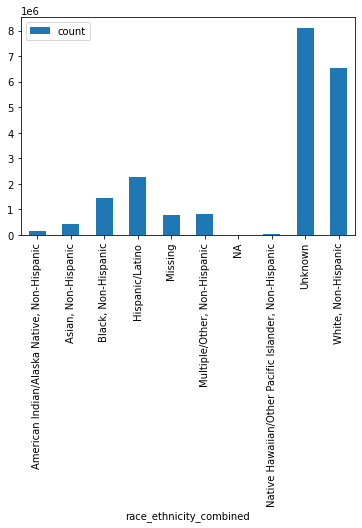

In [76]:
covid_per_group.groupby("race_ethnicity_combined").sum().plot.bar()

<AxesSubplot:xlabel='age_group'>

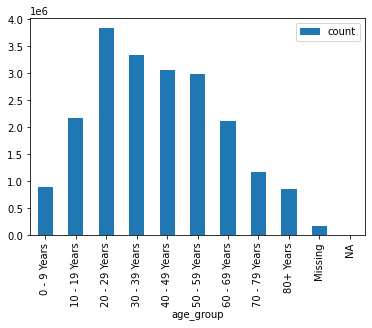

In [77]:
covid_per_group.groupby("age_group").sum().plot.bar()

<AxesSubplot:xlabel='sex'>

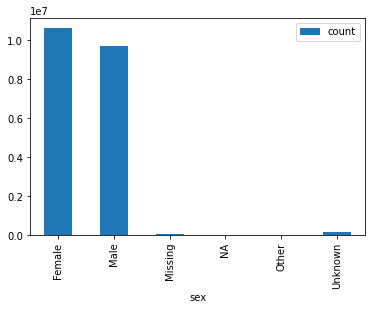

In [78]:
covid_per_group.groupby("sex").sum().plot.bar()

In [72]:
pop_per_group = pd.read_csv("DATA/CENSUS/sc-est2019-alldata6.csv")
pop_per_group.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,3,6,1,Alabama,0,0,1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,1,Alabama,0,0,1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,1,Alabama,0,0,1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,1,Alabama,0,0,1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,1,Alabama,0,0,1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


In [74]:
pop_per_group.groupby(["SEX", "ORIGIN","RACE", "AGE" ]).sum()

SUMLEV  REGION  DIVISION  STATE  CENSUS2010POP  \
SEX ORIGIN RACE AGE                                                   
0   0      1    0      2040     136       261   1477        2853019   
                1      2040     136       261   1477        2882697   
                2      2040     136       261   1477        2972028   
                3      2040     136       261   1477        3003160   
                4      2040     136       261   1477        2979603   
...                     ...     ...       ...    ...            ...   
2   2      6    81     2040     136       261   1477            575   
                82     2040     136       261   1477            517   
                83     2040     136       261   1477            472   
                84     2040     136       261   1477            421   
                85     2040     136       261   1477           2164   

                     ESTIMATESBASE2010  POPESTIMATE2010  POPESTIMATE2011  \
SEX ORIGIN RACE AGE                                                        
0   0      1    0              2853025          2866179          2893308   
                1              2882711          2865878          2871817   
                2              2972033          2963953          2870841   
                3              3003166          2993319          2968600   
                4              2979613          2986046          2997768   
...                                ...              ...              ...   
2   2      6    81                 575              589              625   
                82                 517              532              573   
                83                 472              464              511   
                84                 421              433              442   
                85                2164             2215             2399   

                     POPESTIMATE2012  POPESTIMATE2013  POPESTIMATE2014  \
SEX ORIGIN RACE AGE                                                      
0   0      1    0            2849832          2839033          2853742   
                1            2898501          2855662          2845610   
                2            2876427          2903813          2862018   
                3            2875110          2881389          2909963   
                4            2972795          2879914          2887245   
...                              ...              ...              ...   
2   2      6    81               671              679              671   
                82               606              645              664   
                83               552              580              631   
                84               486              524              557   
                85              2570             2772             2982   

                     POPESTIMATE2015  POPESTIMATE2016  POPESTIMATE2017  \
SEX ORIGIN RACE AGE                                                      
0   0      1    0            2866831          2848236          2805049   
                1            2861016          2874891          2855799   
                2            2852865          2869130          2882439   
                3            2869113          2860745          2876498   
                4            2916709          2876678          2867795   
...                              ...              ...              ...   
2   2      6    81               719              806              873   
                82               652              701              783   
                83               641              631              681   
                84               600              612              604   
                85              3226             3493             3737   

                     POPESTIMATE2018  POPESTIMATE2019  
SEX ORIGIN RACE AGE                                    
0   0      1    0            2748903          2722259  
              